# Material characteristics

This paragraph contains tables containing the different material properties of the defined concrete introduction strength classes [^1].

## Strenght and stiffness

```{table} Properties of concrete classes.
:name: concrete-class-properties
| Material Property                             | C12/15 | C20/25 | C30/37 | C35/45 | C45/55 | C50/60 |
|-----------------------------------------------|----------------|--------|--------|--------|--------|--------|
| Density $ρ_{rep}$ (kg/m³)                          | 2500   | 2500   | 2500   | 2500   | 2500   | 2500   |
| Modulus of Elasticity (uncracked) $E_{cm}$ (N/mm²) | 27000          | 30000  | 33000  | 34000  | 36000  | 37000  |
| Mean Compressive Strength $f_{cm}$ (N/mm²)         | 20             | 28     | 38     | 43     | 53     | 58     |
| Characteristic Cylinder Strength $f_{ck}$ (N/mm²)  | 12             | 20     | 30     | 35     | 45     | 50     |
| Characteristic Cube Strength $f_{ck;cube}$ (N/mm²) | 15             | 25     | 37     | 45     | 55     | 60     |
| Mean Value Tensile Strength $f_{ctm}$ (N/mm²)      | 1.6            | 2.2    | 2.9    | 3.2    | 3.8    | 4.1    |
| Characteristic Tensile Strength $f_{ctk;0,05}$ (N/mm²) | 1.1         | 1.5    | 2.0    | 2.2    | 2.7    | 2.9    |
```

## Strength

Design compressive strength: $ \frac{f_{ck}}{\gamma} = \frac{f_{ck}}{1.5} $

Design shear strength: $ b \cdot d \cdot 0.035 \cdot k^{\frac{3}{2}} \cdot \sqrt{f_{ck}} $ (lower bound, for exact value, see EC2). Shear resistance can be increased using shear reinforcement.

$ k = 1 + \sqrt{\frac{200}{d}} \leq 2 $; d in mm

## Stress-strain diagram
- $σ_{c}$ : concrete compressive stress
- $ε_c$ : concrete compressive strain
- $f_{cd}$ : design compressive strength
- $ε_{c3}$ : strain at the start of plastic deformation
- $ε’_{bu}$ : limit strain
- $ε_{c3}$ : 1,75 ‰
- $ε_{cu3}$ : 3,50 ‰

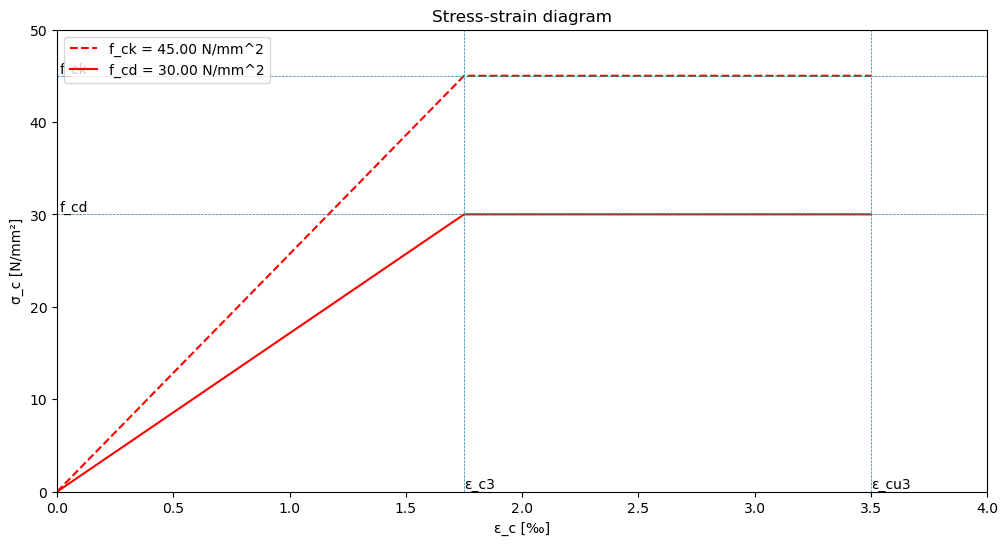

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

eps_array = np.array([[0, 1.75, 3.5],
                [0, 1.75, 3.5],
                [0, 1.75, 3.5],
                [0, 1.75, 3.5],
                [0, 1.75, 3.5],
                [0, 1.75, 3.5],
                [0, 1.8, 3.1],
                [0, 1.9, 2.9],
                [0, 2.0, 2.7],
                [0, 2.2, 2.6],
                [0, 2.3, 2.6]])

f_ck_array = np.array([12, 20, 30, 35, 45, 50, 55, 60, 70, 80, 90])


plt.figure(figsize=(12,6))
i=4

f_ck = np.array([0, f_ck_array[i], f_ck_array[i]])
f_cd = f_ck/1.5
eps = eps_array[i,:]
    
plt.plot(eps, f_ck, c='r', linestyle='--', label=f'f_ck = {f_ck[-1]:.2f} N/mm^2')
plt.plot(eps, f_cd, c='r', label=f'f_cd = {f_cd[-1]:.2f} N/mm^2')
plt.axhline(f_ck[-1], linewidth=0.5, linestyle='--')
plt.axhline(f_cd[-1], linewidth=0.5, linestyle='--')
plt.axvline(eps[-1], linewidth=0.5, linestyle='--')
plt.axvline(eps[-2], linewidth=0.5, linestyle='--')
plt.text(0.01, f_ck[-1], 'f_ck', rotation='horizontal', va='bottom')
plt.text(0.01, f_cd[-1], 'f_cd', rotation='horizontal', va='bottom')
plt.text(eps[-1], 0.01, 'ε_cu3', rotation='horizontal', va='bottom')
plt.text(eps[-2], 0.01, 'ε_c3', rotation='horizontal', va='bottom')


plt.title('Stress-strain diagram')
plt.xlabel('ε_c [‰]')
plt.xlim(0,4)
plt.ylabel('σ_c [N/mm²]')
plt.ylim(0,50)
plt.legend(loc='best');

`````{Note}
This diagram changes when higher strength classes are chosen. For the strength classes shown in the table in this paragraph these values are valid.
`````

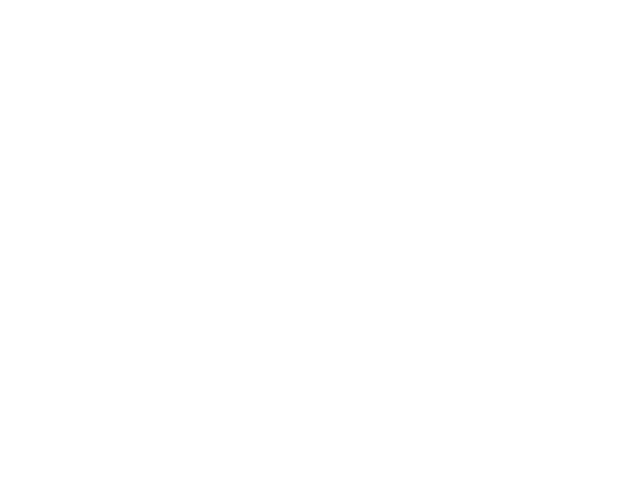

In [2]:
%matplotlib widget

import matplotlib.pyplot as plt
import plotly.subplots as sp
import plotly.graph_objects as go

plt.figure()
plt.rcParams.update({'font.size': 12, 'lines.linewidth': 2})

In [3]:
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

## Colors
grey = '#eeeeee' # light grey fill

### Prepare all the graphs that are to be plotted
#### Define the range of densities to plot
range_elements = np.arange(0, 11, 1)
n_element = np.max(range_elements)

### Create plot
fig = go.Figure()

base_traces = 0 # Number of traces that are always visible

eps_array = np.array([[0, 1.75, 3.5],
                [0, 1.75, 3.5],
                [0, 1.75, 3.5],
                [0, 1.75, 3.5],
                [0, 1.75, 3.5],
                [0, 1.75, 3.5],
                [0, 1.8, 3.1],
                [0, 1.9, 2.9],
                [0, 2.0, 2.7],
                [0, 2.2, 2.6],
                [0, 2.3, 2.6]])

f_ck_array = np.array([12, 20, 30, 35, 45, 50, 55, 60, 70, 80, 90])

## Add traces, one for each slider step
for i in range_elements: 
    f_ck = np.array([0, f_ck_array[i], f_ck_array[i]])
    f_cd = f_ck/1.5
    eps = eps_array[i,:]

    fig.add_trace(  
        go.Scatter(
            visible=False,
            x=eps,
            y=f_ck,
            line=dict(color='#00FF00'),
            mode='lines',
            name=f'f_ck = {f_ck[-1]:.2f} N/mm^2'))

    fig.add_trace(        
        go.Scatter(
            visible=False,
            x=eps,
            y=f_cd,
            line=dict(color='#FF0000'),
            mode='lines',
            name=f'f_cd = {f_cd[-1]:.2f} N/mm^2'))

traces_per_step = 2 # Number of traces per value of i

## Show the traces for one value of a when loading the plot (initial setup)
active_a_index = 1
for i in range(traces_per_step):
    curr_idx = int(base_traces + active_a_index*traces_per_step + i)
    fig.data[curr_idx].visible = True

## Create and add slider
steps = []
for i in range(0, range_elements.shape[0]):
    visarray = [False] * len(fig.data)
    visarray[0:base_traces] = [True] * base_traces
    curr_idx = int(base_traces + i * traces_per_step)
    next_idx = int(base_traces + (i+1) * traces_per_step)
    visarray[curr_idx:next_idx] = [True] * traces_per_step
    step = dict(
        method="update",
        args=[{"visible": visarray}],
        # label=str(round(range_elements[i], 1))
        label=str(round(f_ck_array[i], 1))
    )
    steps.append(step)

sliders = [dict(
    active=active_a_index,
    currentvalue={"prefix": r"Concrete strength class f_ck = "},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    legend_title="Legend",
)

fig.update_xaxes(title_text='ε_c [‰]', range=[-0.1, 3.6])
fig.update_yaxes(title_text='σ_c [N/mm²]', range=[-2, 92])

fig.update_layout(
    title="Stress-strain diagram",
    sliders=sliders,
    legend_title="Legend"
)

fig

[^1]: [Heidelbergcement.com](https://www.heidelbergcement.com/): General information on cement and concrete